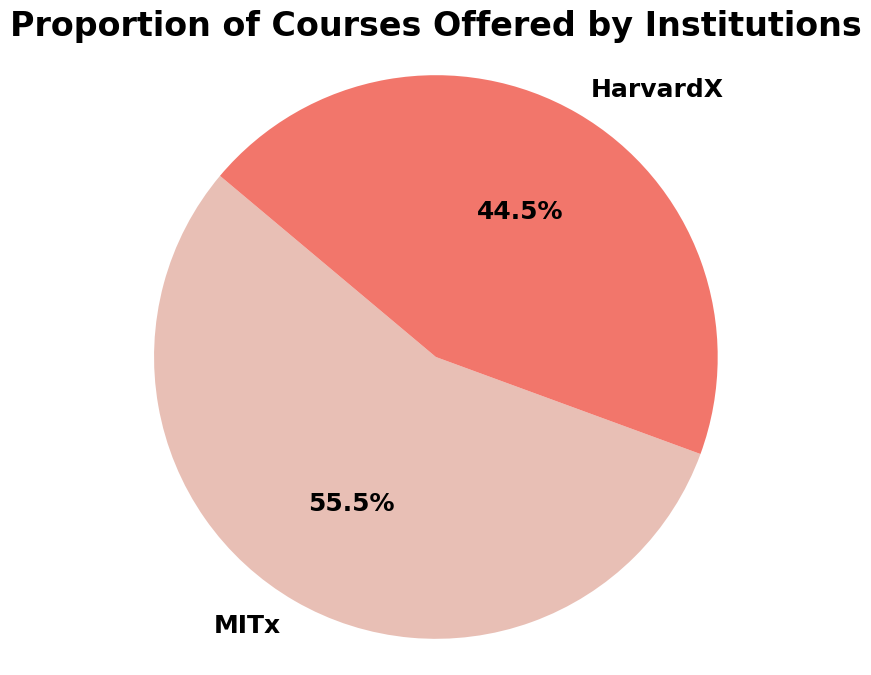

In [27]:
#Proportion of Courses Offered by Institutions

import matplotlib.pyplot as plt
import pandas as pd

# Načtení dat z tabulky "kurzy_cleaned.csv"
data = pd.read_csv("kurzy_cleaned.csv")

# Data pro pie chart
institutions = ["MITx", "HarvardX"]
courses_offered = [
    data[data["Institution"] == institution].shape[0] 
    for institution in institutions
]
colors = ['#e8bfb5', '#F2766B']  # Barvy

# Vytvoření pie chartu
plt.figure(figsize=(8, 8))
plt.pie(
    courses_offered,
    labels=institutions,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 18, 'fontweight': 'bold', 'color': 'black'}
)
# Nastavení nadpisu
plt.title("Proportion of Courses Offered by Institutions", fontsize=24, fontweight='bold', pad=10)

# Zajištění kruhového tvaru
plt.axis('equal')

# Uložení grafu
plt.savefig("Proportion_of_Courses_Offered_by_Institutions.png", bbox_inches='tight')

# Zobrazení grafu
plt.show()

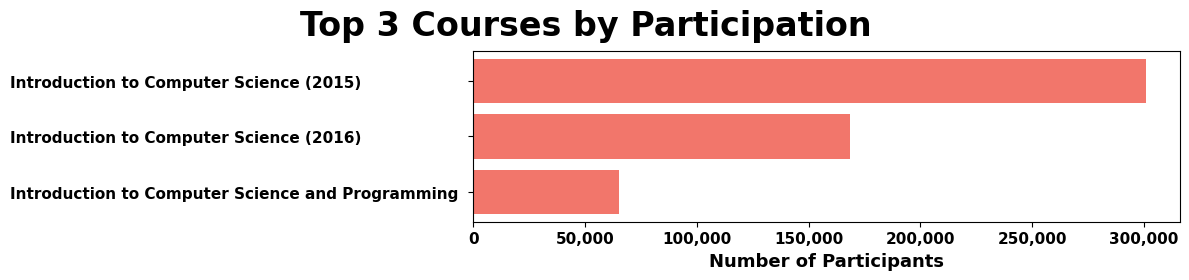

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import StrMethodFormatter

# Načtení dat z CSV souboru
data = pd.read_csv("kurzy_cleaned.csv")

# Seřazení dat podle počtu účastníků, sestupně
data = data.sort_values(by='Participants_(Course_Content_Accessed)', ascending=False)

# Výběr unikátních kurzů (první výskyt každého názvu)
data = data.drop_duplicates(subset='Course_Title', keep='first')

# Výběr top 3 kurzů s nejvyšším počtem účastníků
top_3_courses = data.iloc[:3].copy()

# Přidání informací o kurzu (včetně názvu a případně další úpravy)
top_3_courses['Course_Info'] = top_3_courses['Course_Title']
top_3_courses['Course_Info'] = top_3_courses['Course_Info'].replace(
    'Introduction to Computer Science', 
    'Introduction to Computer Science (2015)'
)

# Vytvoření horizontálního sloupcového grafu
plt.figure(figsize=(12, 3))  # Nastavení velikosti grafu

# Vykreslení sloupců
bars = plt.barh(
    top_3_courses['Course_Info'],  # Popisky osy y (kurzy)
    top_3_courses['Participants_(Course_Content_Accessed)'],  # Hodnoty osy x (počet účastníků)
    color='#F2766B'  # Barva sloupců
)

# Přidání hlavního nadpisu grafu (ručně umístěného)
plt.text(0.16, 1.15,  # Souřadnice textu relativně k grafu
         'Top 3 Courses by Participation',  # Text nadpisu
         fontsize=24, fontweight='bold', 
         transform=plt.gca().transAxes,  # Transformace pro relativní pozicování
         ha='center', va='center')  # Zarovnání

# Popisky os
plt.xlabel('Number of Participants', fontsize=13, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold', ha='left')

# Posunutí popisků osy y pro lepší čitelnost
plt.gca().tick_params(axis='y', pad=330)

# Na ose x formátování čísel pro oddělení tisíců čárkou
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Zvýraznění čísel na ose x
plt.gca().tick_params(axis='x', labelsize=11)
for label in plt.gca().get_xticklabels():
    label.set_fontweight('bold')

# Obrácení pořadí osy y, aby nejpopulárnější kurz byl nahoře
plt.gca().invert_yaxis()

# Automatické zarovnání prvků v grafu
plt.tight_layout()

# Uložení grafu jako obrázku ve formátu PNG
plt.savefig("top_3_courses.png", dpi=300, bbox_inches='tight')

# Zobrazení grafu
plt.show()


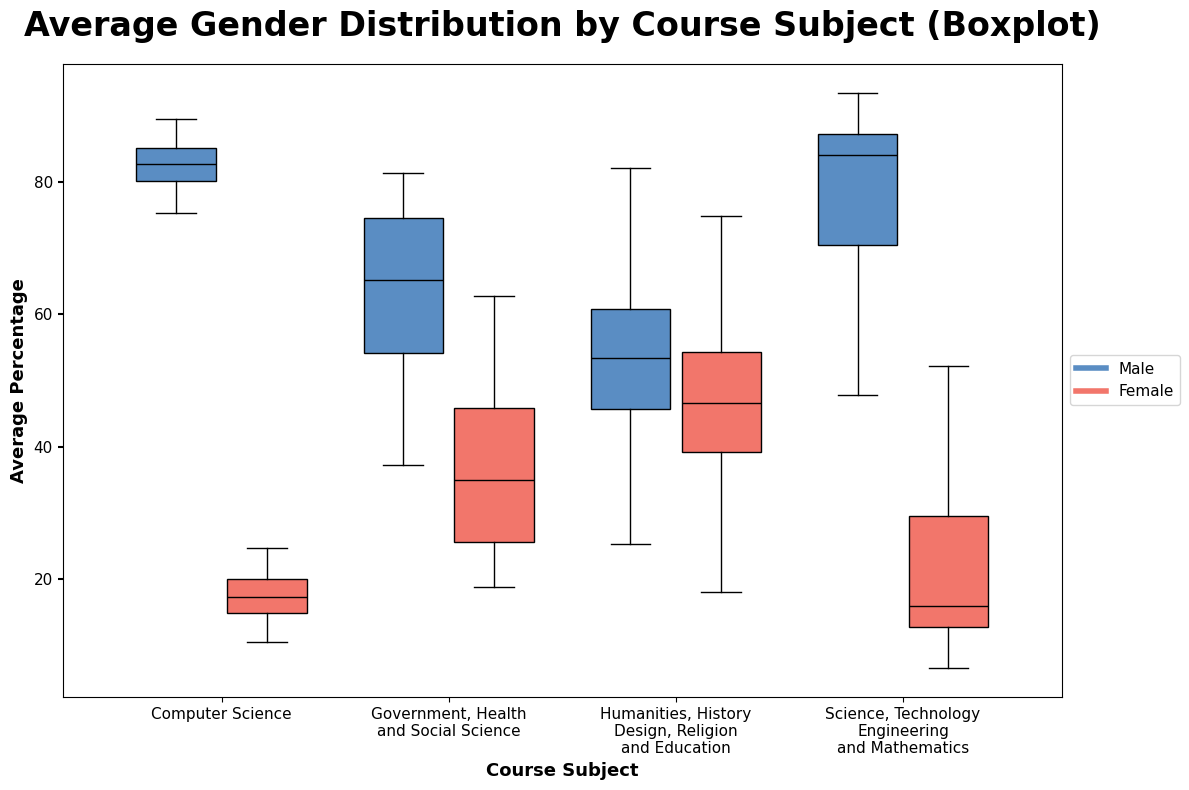

In [11]:
# Importování potřebných knihoven
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Načtení dat z CSV souboru
data = pd.read_csv("kurzy_cleaned.csv")

# Výpočet průměrného procenta mužů a žen podle studijních oborů
gender_distribution = data.groupby('Course_Subject')[['%_Male', '%_Female']].mean().reset_index()

# Příprava seznamu oborů pro vykreslení
subjects = gender_distribution['Course_Subject']

# Funkce pro zalomení dlouhých názvů oborů do maximálně 3 řádků
def wrap_text(subject, max_lines=3):
    words = subject.split(', ')  # Rozdělení názvu podle čárek
    lines = ['']
    for word in words:
        # Pokud délka řádku nepřekročí 20 znaků, přidáme další část na stejný řádek
        if len(lines[-1] + word) < 20:
            lines[-1] += (', ' if lines[-1] else '') + word
        else:
            # Pokud je řádek příliš dlouhý, vytvoříme nový
            lines.append(word)
    return '\n'.join(lines[:max_lines])  # Vrátíme zalomený text jako řetězec

# Zalomení všech názvů oborů
wrapped_subjects = [wrap_text(subject) for subject in subjects]

# Příprava dat pro boxplot
male_data = [data[data['Course_Subject'] == subject]['%_Male'].dropna() for subject in subjects]  # Data pro muže
female_data = [data[data['Course_Subject'] == subject]['%_Female'].dropna() for subject in subjects]  # Data pro ženy

# Vytvoření boxplotu pro zastoupení mužů a žen v jednotlivých studijních oborech
fig, ax = plt.subplots(figsize=(12, 8))

# Boxplot pro data mužů
bp1 = ax.boxplot(male_data, positions=np.arange(len(subjects)) - 0.2, widths=0.35, patch_artist=True, 
                 boxprops=dict(facecolor='#5A8DC3', color='black'),  # Modrá barva pro muže
                 medianprops=dict(color='black'), labels=wrapped_subjects, vert=True)

# Boxplot pro data žen
bp2 = ax.boxplot(female_data, positions=np.arange(len(subjects)) + 0.2, widths=0.35, patch_artist=True, 
                 boxprops=dict(facecolor='#F2766B', color='black'),  # Růžová barva pro ženy
                 medianprops=dict(color='black'), vert=True)

# Nastavení popisků os a nadpisu grafu
ax.set_ylabel('Average Percentage', fontsize=13, fontweight='bold')  # Popis osy Y
ax.set_xlabel('Course Subject', fontsize=13, fontweight='bold')  # Popis osy X
ax.set_title('Average Gender Distribution by Course Subject (Boxplot)', fontsize=24, fontweight='bold', loc='center', pad=20)  # Nadpis grafu
ax.set_xticks(np.arange(len(subjects)))
ax.set_xticklabels(wrapped_subjects, fontsize=11, fontweight='normal')  # Zalomené a normální popisky X-ové osy

# Vytvoření vlastní legendy
legend_elements = [
    plt.Line2D([0], [0], color='#5A8DC3', lw=4, label='Male'),  # Modrá barva pro muže
    plt.Line2D([0], [0], color='#F2766B', lw=4, label='Female')  # Růžová barva pro ženy
]
legend = ax.legend(handles=legend_elements, fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5))  # Umístění legendy vedle grafu
for text in legend.get_texts():
    text.set_fontweight('normal')  # Normální styl textu v legendě

# Nastavení popisků na ose Y
ax.tick_params(axis='y', labelsize=11, width=1.5)
for label in ax.get_yticklabels():
    label.set_fontweight('normal')  # Normální styl pro čísla na ose Y

# Odstranění mřížky z grafu
ax.grid(False)

# Úprava rozložení pro lepší zarovnání
plt.tight_layout()

# Uložení grafu jako obrázku ve formátu PNG
plt.savefig("Average_Gender_Distribution_by_Course_Subject.png", dpi=300, bbox_inches='tight')

# Zobrazení grafu
plt.show()





